# EDA for Time series forecasting

Infected by COVID-19 (USA)

Author: Jim Xie

Date: 2020-7-20

In [1]:
import sys
#!{sys.executable} -m pip install seaborn==0.9.0
import seaborn
import random
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set(rc={"figure.figsize": (24, 12)})
plt.style.use({'figure.figsize':(24, 12)})
sns.set_style('dark')
sns.set_context("poster")
#np.set_printoptions(suppress=True,   precision=10,  threshold=2000,  linewidth=150)  
pd.set_option('display.float_format',lambda x : '%.2f' % x)
plt.rcParams['axes.unicode_minus'] = False
from warnings import filterwarnings
filterwarnings('ignore')

# 总览

In [2]:
df = pd.read_csv('./US/datasets_555089_1255330_us_covid19_daily.csv')
df = pd.read_csv('./US-812/datasets_555089_1411155_us_covid19_daily.csv')
df = pd.read_csv('./US-830/us_covid19_daily.csv')
df['date'] = df['date'].astype(str)
df.sort_values('date',ascending=True,inplace=True)
df.shape

(221, 25)

In [3]:
print(df['date'].min(),"---",df['date'].max())
df.tail(5)

20200122 --- 20200829


,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
4,20200825,56,5750167,67625238,4091.00,38762.00,362452.00,7851.00,16920.00,2163.00,...,2020-08-25T00:00:00Z,73379496,73375405,73375405,1147,1999,597782,36374,634156,c31219b712a71669cbb4c3f73ef53df0733416d5
3,20200826,56,5793523,68256910,4081.00,38411.00,364325.00,7763.00,17046.00,2142.00,...,2020-08-26T00:00:00Z,74054514,74050433,74050433,1298,1873,631672,43356,675028,fb7647b9fce989365ac29d1e344d8239128c7ac7
2,20200827,56,5837507,68954986,11168.00,37464.00,365993.00,7717.00,17181.00,2125.00,...,2020-08-27T00:00:00Z,74803661,74792493,74792493,1129,1668,698076,43984,742060,da4b2487096e8fc8476aa6346cfa0dc8796d86ba
1,20200828,56,5884053,69680696,10428.00,37239.00,367588.00,7558.00,17304.00,2086.00,...,2020-08-28T00:00:00Z,75575177,75564749,75564749,1023,1595,725710,46546,772256,3813626949a226a418b90db88ac160321c81aa5b
0,20200829,56,5928381,70397186,11151.00,36470.00,368866.00,7426.00,17401.00,2060.00,...,2020-08-29T00:00:00Z,76336718,76325567,76325567,1014,1278,716490,44328,760818,2acac150885e7c316b74fe7a1aa84831658a0cc5


In [4]:
df.isnull().sum()

date                         0
states                       0
positive                     0
negative                     0
pending                     42
hospitalizedCurrently       55
hospitalizedCumulative      42
inIcuCurrently              64
inIcuCumulative             63
onVentilatorCurrently       63
onVentilatorCumulative      70
recovered                   63
dateChecked                  0
death                       19
hospitalized                42
lastModified                 0
total                        0
totalTestResults             0
posNeg                       0
deathIncrease                0
hospitalizedIncrease         0
negativeIncrease             0
positiveIncrease             0
totalTestResultsIncrease     0
hash                         0
dtype: int64

In [5]:
df.dtypes

date                         object
states                        int64
positive                      int64
negative                      int64
pending                     float64
hospitalizedCurrently       float64
hospitalizedCumulative      float64
inIcuCurrently              float64
inIcuCumulative             float64
onVentilatorCurrently       float64
onVentilatorCumulative      float64
recovered                   float64
dateChecked                  object
death                       float64
hospitalized                float64
lastModified                 object
total                         int64
totalTestResults              int64
posNeg                        int64
deathIncrease                 int64
hospitalizedIncrease          int64
negativeIncrease              int64
positiveIncrease              int64
totalTestResultsIncrease      int64
hash                         object
dtype: object

In [6]:
df.describe(include='all')

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
count,221,221.00,221.00,221.00,179.00,166.00,179.00,157.00,158.00,158.00,...,221,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221
unique,221,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,221,nan,nan,nan,nan,nan,nan,nan,nan,221
top,20200217,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2020-04-19T00:00:00Z,nan,nan,nan,nan,nan,nan,nan,nan,1b233a3147528396eb83532c59757880f63200a4
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,1,nan,nan,nan,nan,nan,nan,nan,nan,1
mean,NaN,45.04,1789319.04,18507044.70,7509.68,41164.01,184439.07,8690.90,8790.17,3319.53,...,NaN,20302446.24,20296363.74,20296363.74,790.81,1669.08,318539.30,26825.25,345364.56,NaN
std,NaN,21.39,1835068.15,21726886.07,13753.12,15071.24,114424.28,3197.06,5084.23,1626.46,...,NaN,23547449.11,23549336.42,23549336.42,687.83,1875.15,275331.87,21352.63,294541.99,NaN
min,NaN,1.00,0.00,0.00,103.00,325.00,4.00,1299.00,74.00,167.00,...,NaN,0.00,0.00,0.00,0.00,-2841.00,0.00,0.00,0.00,NaN
25%,NaN,56.00,10342.00,65131.00,2120.50,32457.25,91137.50,5930.00,4521.25,2260.00,...,NaN,77160.00,75473.00,75473.00,23.00,10.00,16525.00,3082.00,18025.00,NaN
50%,NaN,56.00,1352463.00,8053622.00,3307.00,42533.00,213260.00,8487.00,9334.00,2707.00,...,NaN,9408074.00,9406085.00,9406085.00,724.00,1440.00,290562.00,25097.00,309685.00,NaN
75%,NaN,56.00,2890899.00,32872797.00,4195.00,53973.75,270650.50,10472.00,12590.50,4758.25,...,NaN,35765581.00,35763696.00,35763696.00,1231.00,2318.00,597782.00,42487.00,638231.00,NaN


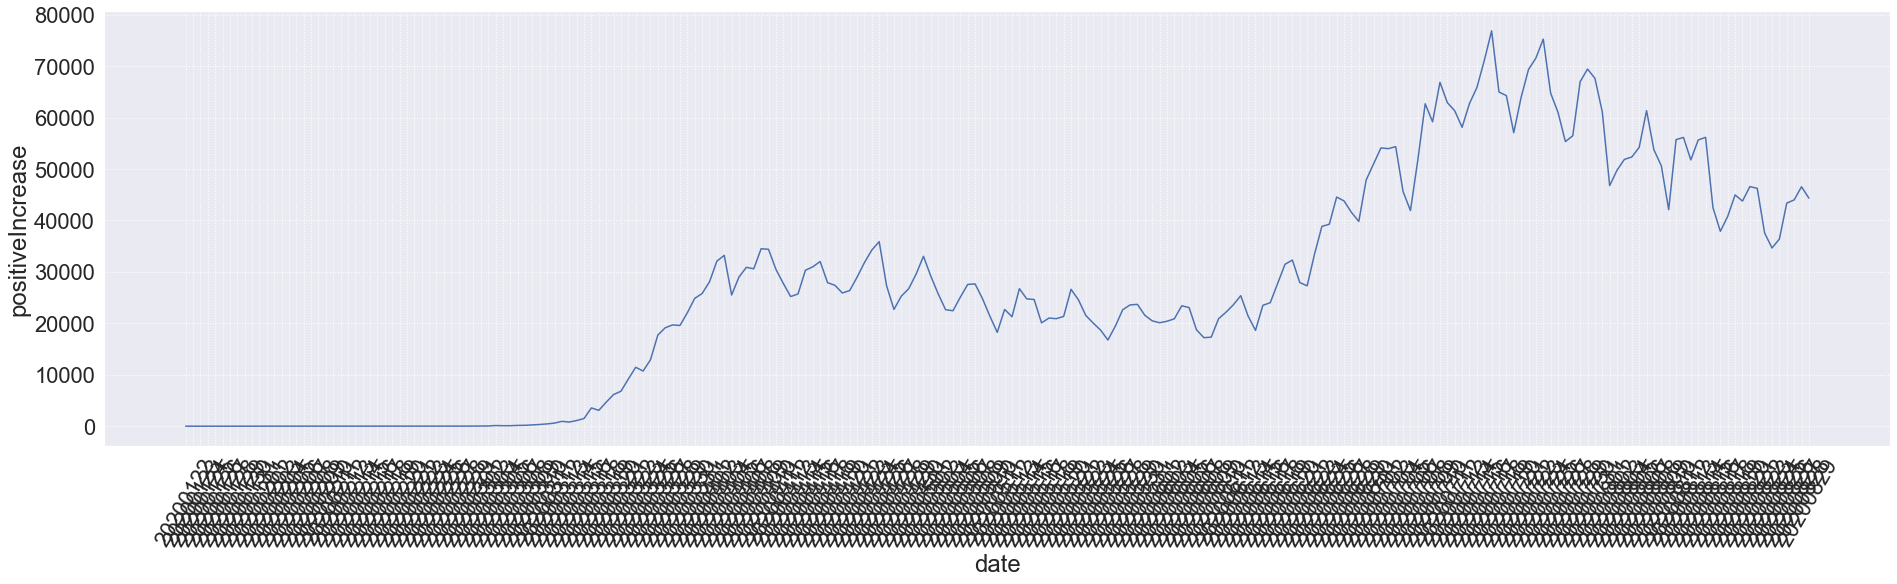

In [7]:
plt.style.use({'figure.figsize':(32, 8)})
sns.set(font_scale=2)
ax=sns.lineplot(x='date', y="positiveIncrease", data=df)
ax.set_xticklabels(df['date'], rotation=60)
plt.grid(linestyle=':')
plt.show()

# 根据日期变化趋势分析

In [8]:
df = pd.read_csv('./US/us_states_covid19_daily.csv')
df = pd.read_csv('./US-830/us_states_covid19_daily.csv')
del df['hash']
del df['commercialScore']
del df['negativeRegularScore']
del df['negativeScore']
del df['positiveScore']
del df['score']
del df['grade']
del df['hospitalizedIncrease']
del df['deathIncrease']
del df['hospitalizedCumulative']
del df['hospitalizedCurrently']
del df['inIcuCurrently']
del df['inIcuCumulative']
del df['onVentilatorCurrently']
del df['onVentilatorCumulative']
del df['recovered']
del df['lastUpdateEt']
del df['dateModified']
del df['checkTimeEt']
del df['dateChecked']
df['date'] = df['date'].astype(str)
df.fillna(value=0,inplace=True)
df.head(5)

,date,state,positive,negative,pending,dataQualityGrade,death,hospitalized,totalTestsViral,positiveTestsViral,...,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsSource,totalTestResults,totalTestResultsIncrease,posNeg
0,20200829,AK,6035.00,339660.00,0.00,A,37.00,0.00,345695.00,5558.00,...,0.00,0.00,2,112,6045,345695,posNeg,345695.00,6157,345695
1,20200829,AL,123889.00,851929.00,0.00,B,2152.00,14267.00,967213.00,0.00,...,0.00,0.00,1,1704,9251,975818,posNeg,975818.00,10955,975818
2,20200829,AR,60378.00,646592.00,0.00,A,772.00,4142.00,706970.00,0.00,...,3610.00,0.00,5,795,8120,706970,posNeg,706970.00,8915,706970
3,20200829,AS,0.00,1514.00,0.00,C,0.00,0.00,0.00,0.00,...,0.00,0.00,60,0,0,1514,posNeg,1514.00,0,1514
4,20200829,AZ,201287.00,991089.00,0.00,A+,5007.00,21433.00,1190668.00,0.00,...,0.00,0.00,4,629,7670,1192376,posNeg,1192376.00,8299,1192376


In [9]:
def GetSeries(key):
    df1 = df.groupby(['date'])[key].sum()
    df1 = df1.to_frame().reset_index()
    df1.sort_values(key,ascending=True,inplace=True)
    return df1

def ShowTrend(key_list,df):
    plt.style.use({'figure.figsize':(32, 10)})
    sns.set(font_scale=2)
    if type(key_list) == type([]):
        dd = []
        for key in key_list:
            dd.append(df[key])
        ax = sns.lineplot(data=dd)
    else:
        ax = sns.lineplot(x=df.index, y=key_list, markers=True, data=df)
        #ax.set_xticklabels(df[key_list], rotation=60)
    ax.ticklabel_format(style='plain',axis='both')    
    ax.set_title('Trend')
    ax.set_ylabel('count')
    ax.set_ylabel('date')
    plt.grid(linestyle=':')
    plt.show()
    
def GetFeatures():
    df2 = pd.DataFrame()
    df2['date'] = GetSeries('positive')['date']
    df2['positive']=GetSeries('positive')['positive']
    df2['positiveIncrease']=GetSeries('positiveIncrease')['positiveIncrease']
    df2['test'] = GetSeries('total')['total']
    df2['testIncrease'] = GetSeries('totalTestResultsIncrease')['totalTestResultsIncrease']
    return df2

# 检测数量和感染数量同步增加

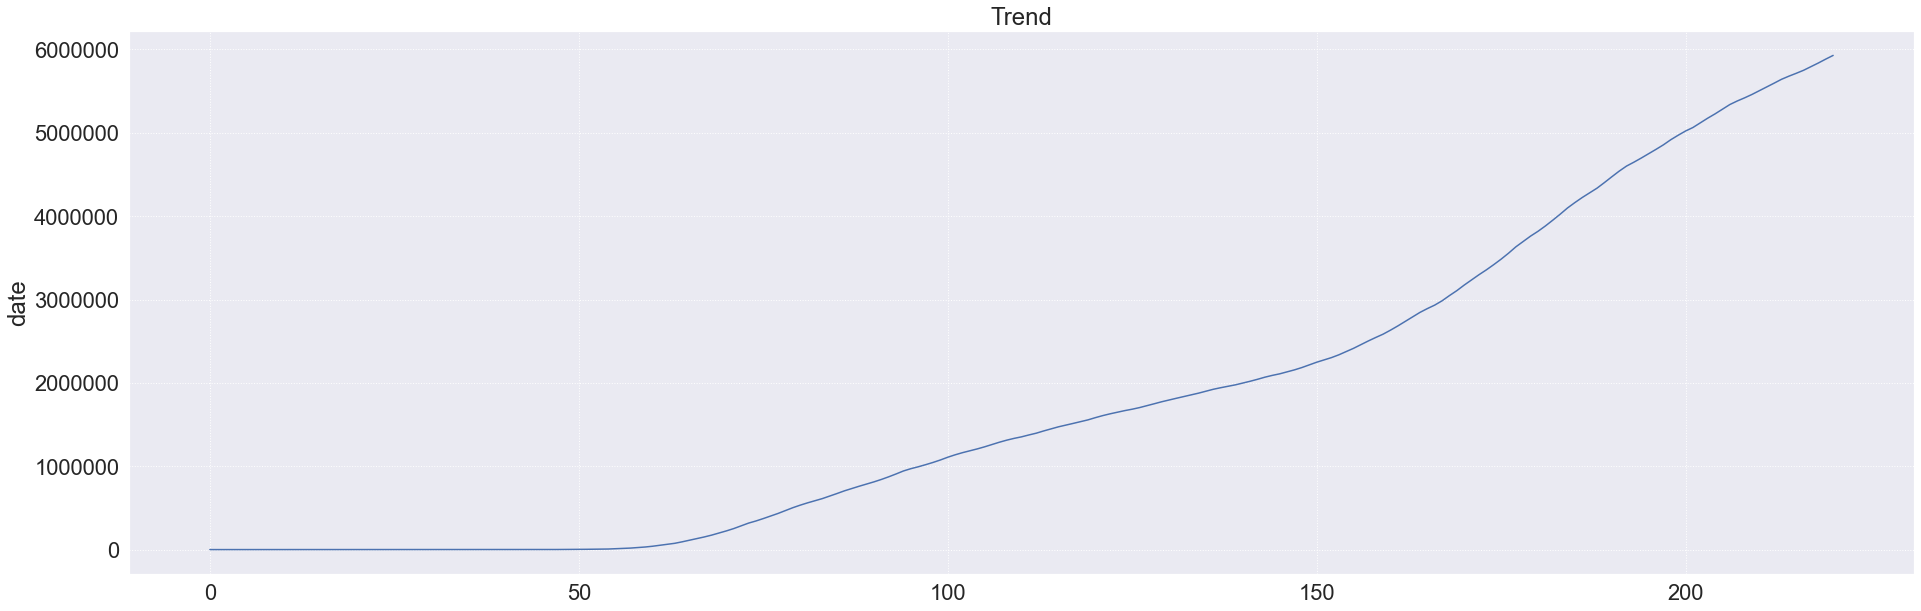

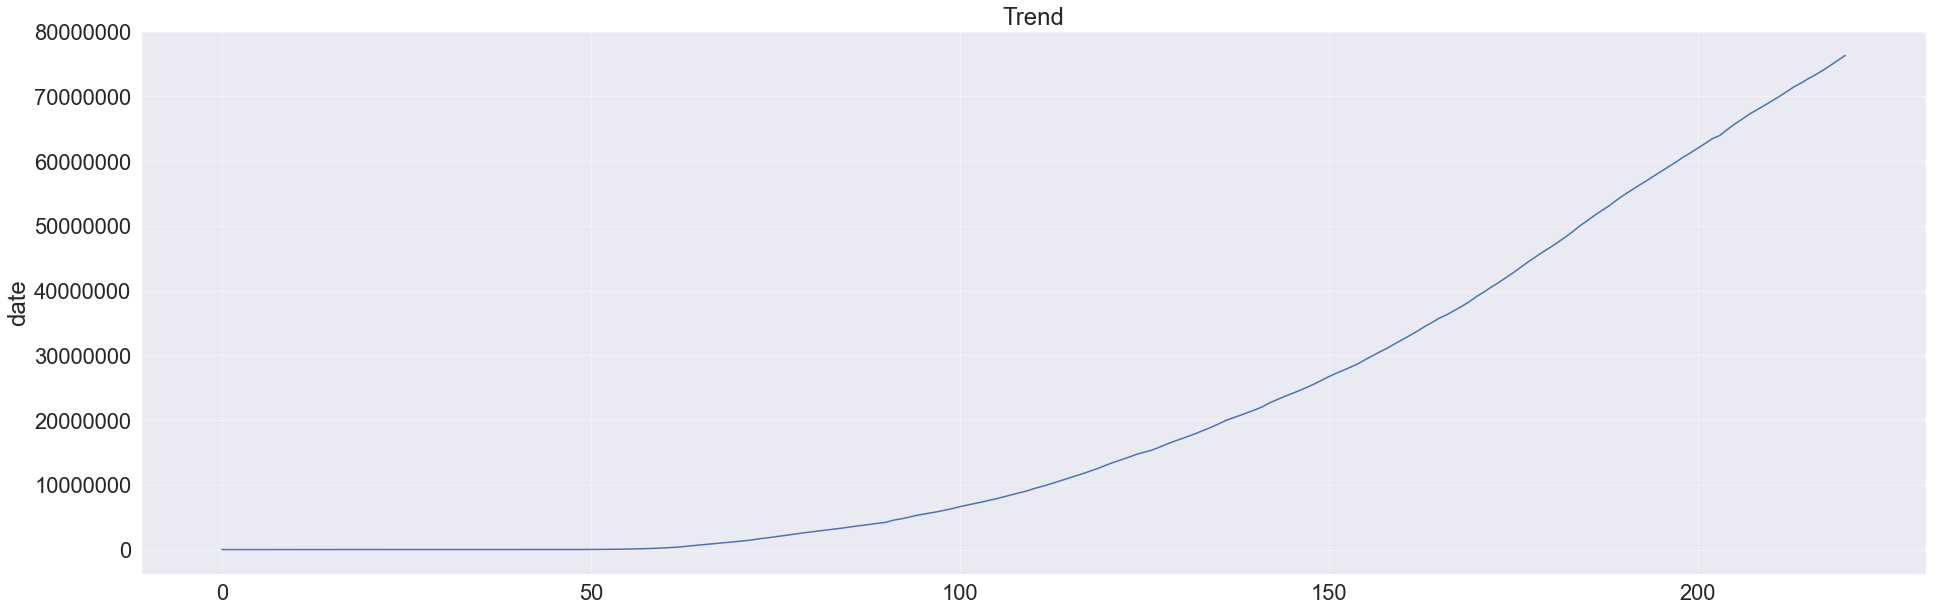

In [10]:
df1 = GetFeatures()
ShowTrend('positive',df1)
ShowTrend('test',df1)
#ShowTrend('positiveIncrease',df1)
#ShowTrend('testIncrease',df1)
#ShowTrend(['positiveIncrease','testIncrease','positive','test'],df1)

# 提取大规模检测后的数据

In [11]:
df2 = df1[df1['positiveIncrease']>25000]
df2.head(3)

,date,positive,positiveIncrease,test,testIncrease
70,20200401,224089.00,25785,1268243,108383
71,20200402,252146.00,28057,1389790,119310
72,20200403,284222.00,32076,1522758,132623


# 感染新增人数震荡下滑趋势

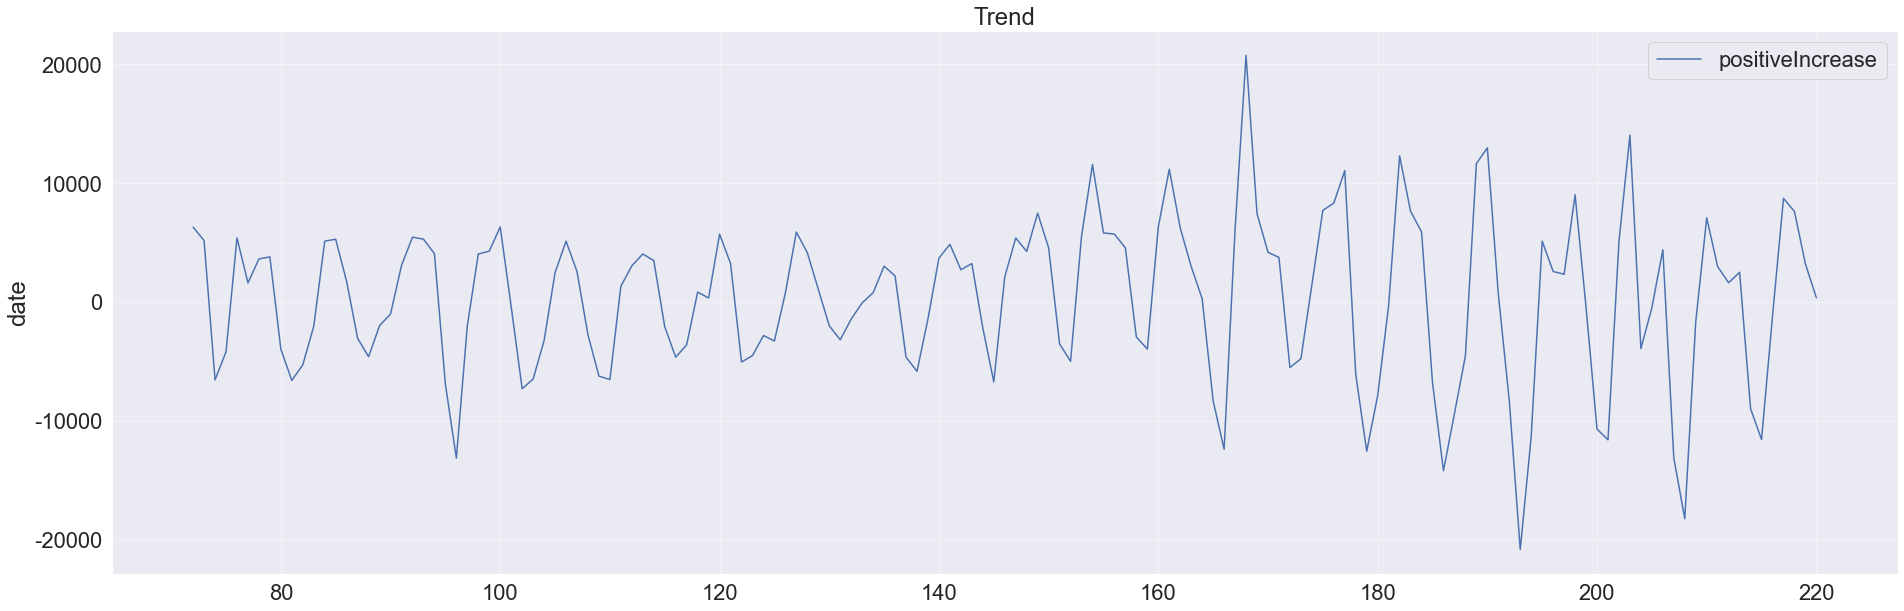

In [12]:
df2 = df1[df1['date']>='20200401']
df2['positiveIncrease'] = df2['positiveIncrease'].diff(2)
ShowTrend(['positiveIncrease'],df2)

# 检测数量和感染人数强关联

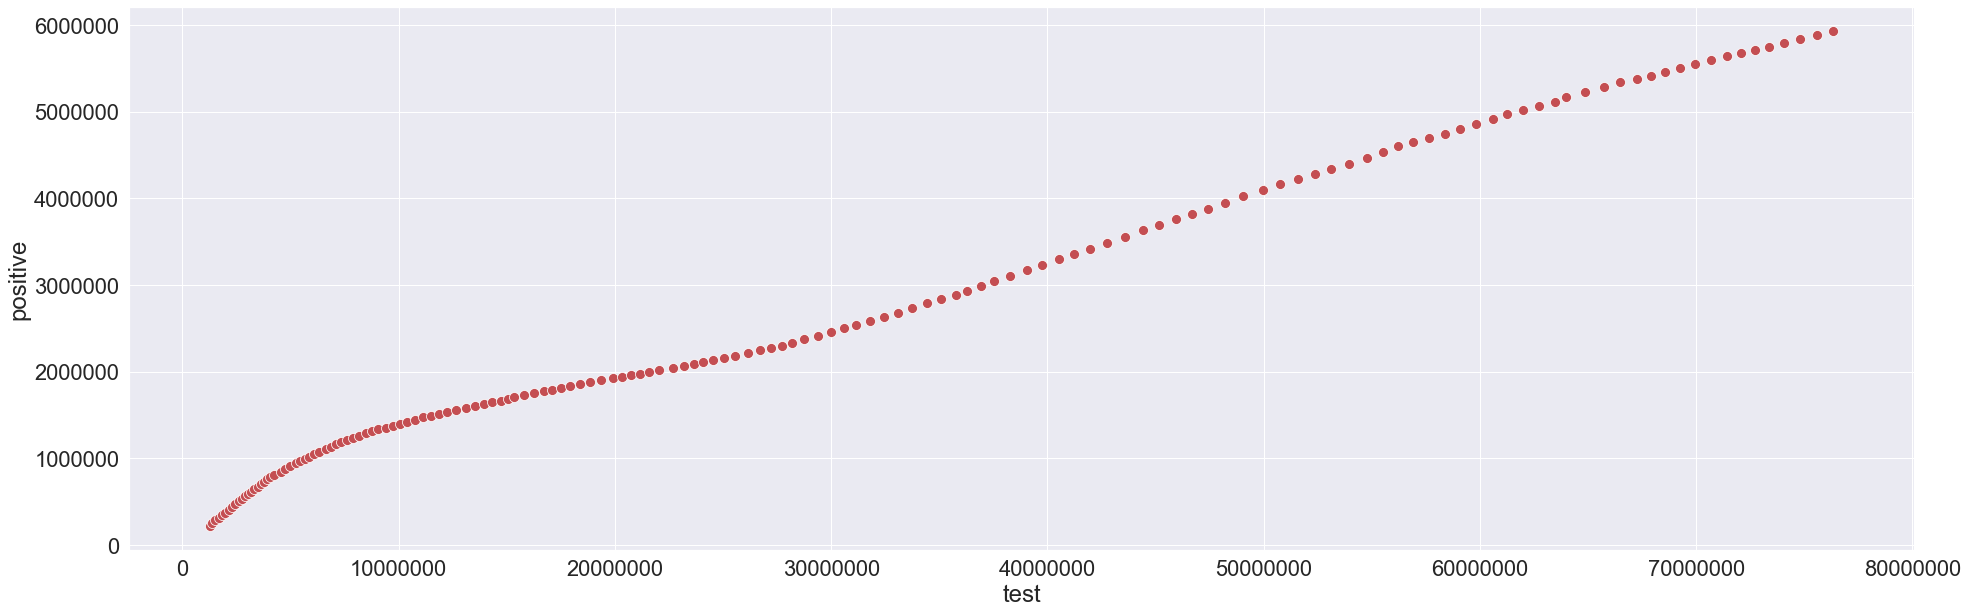

In [13]:
ax = sns.scatterplot(x="test", y="positive",s=100,color='r',data=df2)
#ax = sns.scatterplot(x="testIncrease", y="positiveIncrease",s=100,color='r',data=df2)
ax.ticklabel_format(style='plain',axis='both')  

In [14]:
df2.corr()

,positive,positiveIncrease,test,testIncrease
positive,1.00,-0.05,1.00,0.88
positiveIncrease,-0.05,1.00,-0.03,0.06
test,1.00,-0.03,1.00,0.89
testIncrease,0.88,0.06,0.89,1.00


# 根据地区（州）感染人数分析

In [15]:
df3 = df[df['date']>='20200401']
df3 = df3.groupby(['date','state'])['positive'].sum().reset_index(name="count")
df3.sort_values('date',ascending=False,inplace=True)
df3.head(3)

,date,state,count
8455,20200829,WY,3784.00
8427,20200829,MP,56.00
8425,20200829,MN,74257.00


In [16]:
pt = df3.pivot_table(index='date', columns='state',  values=['count'],aggfunc=np.mean)
pt.fillna(value=0,inplace=True)
pt.head(10)

count                                                         \
state        AK      AL      AR   AS      AZ       CA      CO       CT   
date                                                                     
20200401 133.00 1077.00  584.00 0.00 1413.00  8155.00 2966.00  3557.00   
20200402 143.00 1233.00  643.00 0.00 1598.00  9191.00 3342.00  3824.00   
20200403 157.00 1432.00  704.00 0.00 1769.00 10701.00 3728.00  4914.00   
20200404 171.00 1580.00  743.00 0.00 2019.00 12026.00 4173.00  5276.00   
20200405 185.00 1796.00  830.00 0.00 2269.00 13438.00 4565.00  5675.00   
20200406 191.00 1968.00  875.00 0.00 2456.00 14336.00 4950.00  6906.00   
20200407 213.00 2119.00  946.00 0.00 2575.00 15865.00 5172.00  7781.00   
20200408 226.00 2369.00 1000.00 0.00 2726.00 16957.00 5429.00  7781.00   
20200409 235.00 2769.00 1119.00 0.00 3018.00 18309.00 5655.00  9784.00   
20200410 246.00 2968.00 1171.00 0.00 3112.00 19472.00 6510.00 10538.00   

                          ...                                                \
state         DC      DE  ...      TN       TX      UT      VA    VI     VT   
date                      ...                                                 
20200401  586.00  368.00  ... 2683.00  3997.00 1012.00 1484.00 30.00 359.00   
20200402  653.00  393.00  ... 2845.00  4669.00 1074.00 1706.00 33.00 390.00   
20200403  757.00  450.00  ... 3067.00  5330.00 1246.00 2012.00 38.00 460.00   
20200404  902.00  593.00  ... 3321.00  6110.00 1428.00 2407.00 40.00 512.00   
20200405  998.00  673.00  ... 3633.00  6812.00 1605.00 2637.00 42.00 543.00   
20200406 1097.00  673.00  ... 3802.00  7276.00 1675.00 2878.00 43.00 575.00   
20200407 1211.00  928.00  ... 4138.00  8262.00 1738.00 3333.00 43.00 608.00   
20200408 1440.00  928.00  ... 4362.00  9353.00 1846.00 3645.00 45.00 631.00   
20200409 1523.00 1207.00  ... 4634.00 10230.00 1976.00 4042.00 46.00 680.00   
20200410 1660.00 1326.00  ... 4862.00 11671.00 2102.00 4509.00 50.00 713.00   

                                         
state          WA      WI     WV     WY  
date                                     
20200401  7399.00 1821.00 191.00 130.00  
20200402  7796.00 2040.00 217.00 150.00  
20200403  8211.00 2263.00 237.00 162.00  
20200404  8418.00 2476.00 282.00 187.00  
20200405  8589.00 2643.00 324.00 197.00  
20200406  8983.00 2866.00 345.00 210.00  
20200407  9396.00 3064.00 412.00 216.00  
20200408  9741.00 3279.00 462.00 221.00  
20200409 10104.00 3443.00 523.00 230.00  
20200410 10413.00 3665.00 554.00 253.00  

[10 rows x 56 columns]

# NY,CA,IL,MA,NJ 感染人数较多，CA,TX,FL,AZ 新增较多

<AxesSubplot:xlabel='None-state', ylabel='date'>

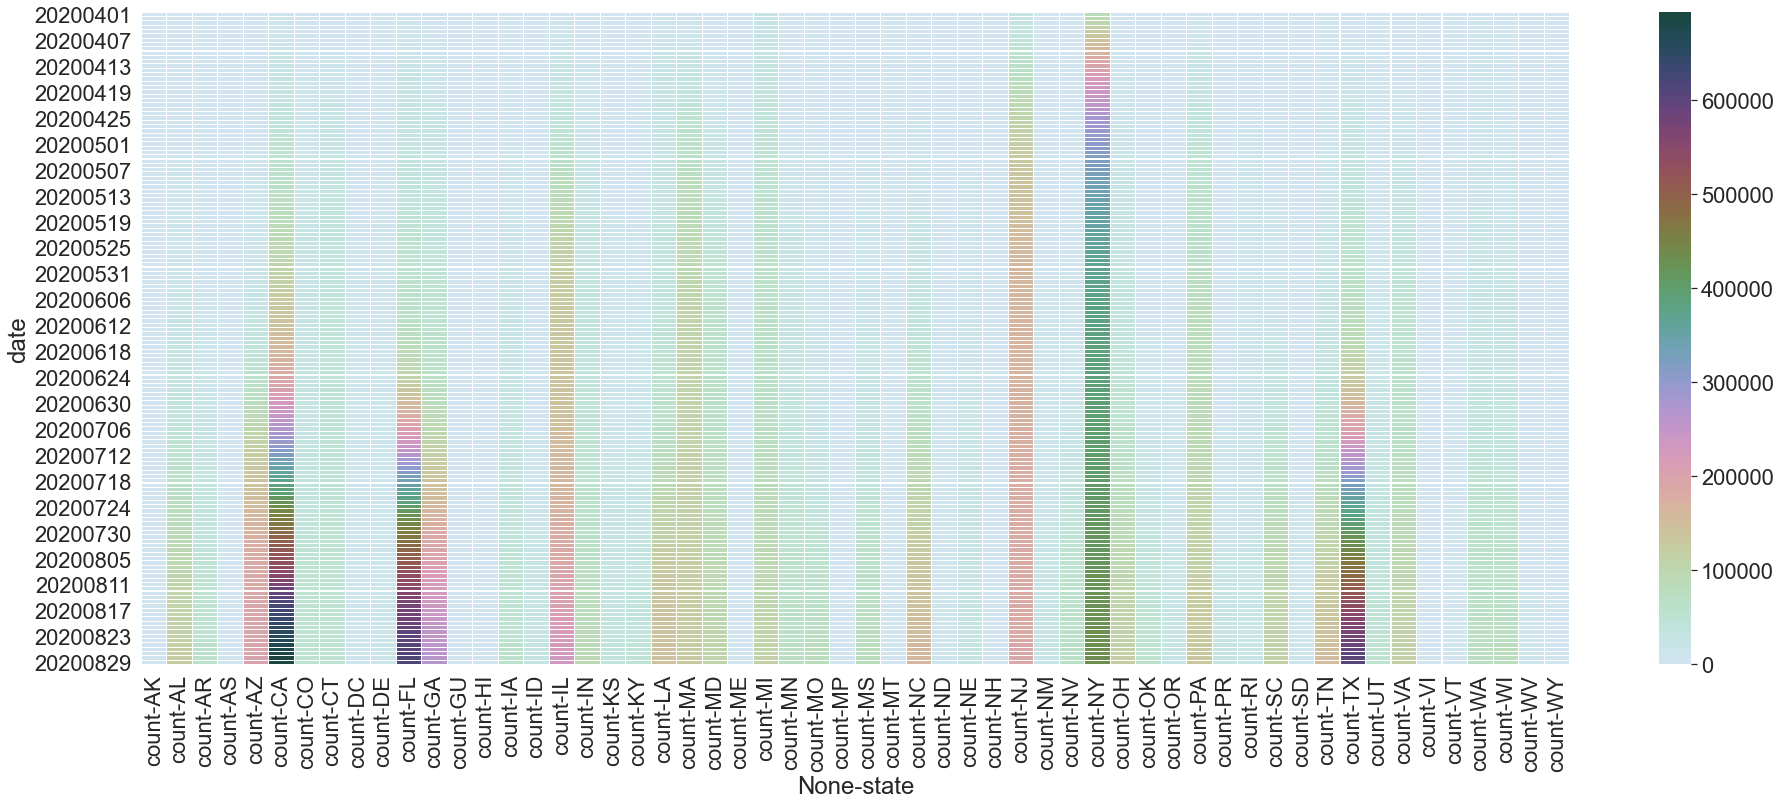

In [17]:
plt.style.use({'figure.figsize':(32, 12)})
plt.ticklabel_format(style='plain',axis='both')
cmap = sns.cubehelix_palette(start = 1, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(pt, cmap = cmap, linewidths = 0.05,annot=False, fmt="g")

In [18]:
df4 = df[(df['date'] >= '20200401') ]
df5 = df4[df4['positive']>50000]
#df5 = df5[df5['state']!='NY']
df5.fillna(value=0,inplace=True)
df5 = df5.reset_index()
df5.sort_values('date',ascending=True,inplace=True)

<AxesSubplot:xlabel='state', ylabel='positive'>

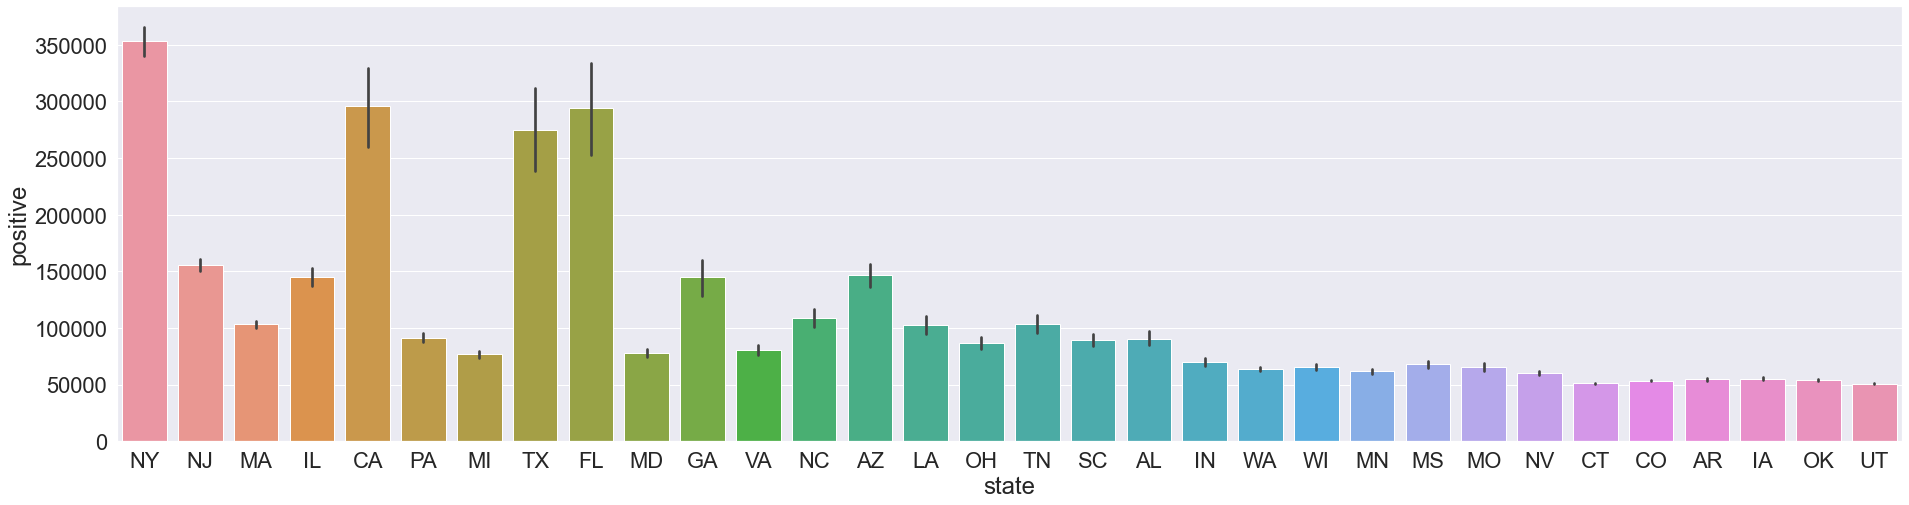

In [19]:
plt.style.use({'figure.figsize':(32, 8)})
sns.set(font_scale=2)
sns.barplot(x="state", y="positive", data=df5)

# 各州疫情爆发日期不同，无明显规律，需要进一步研究

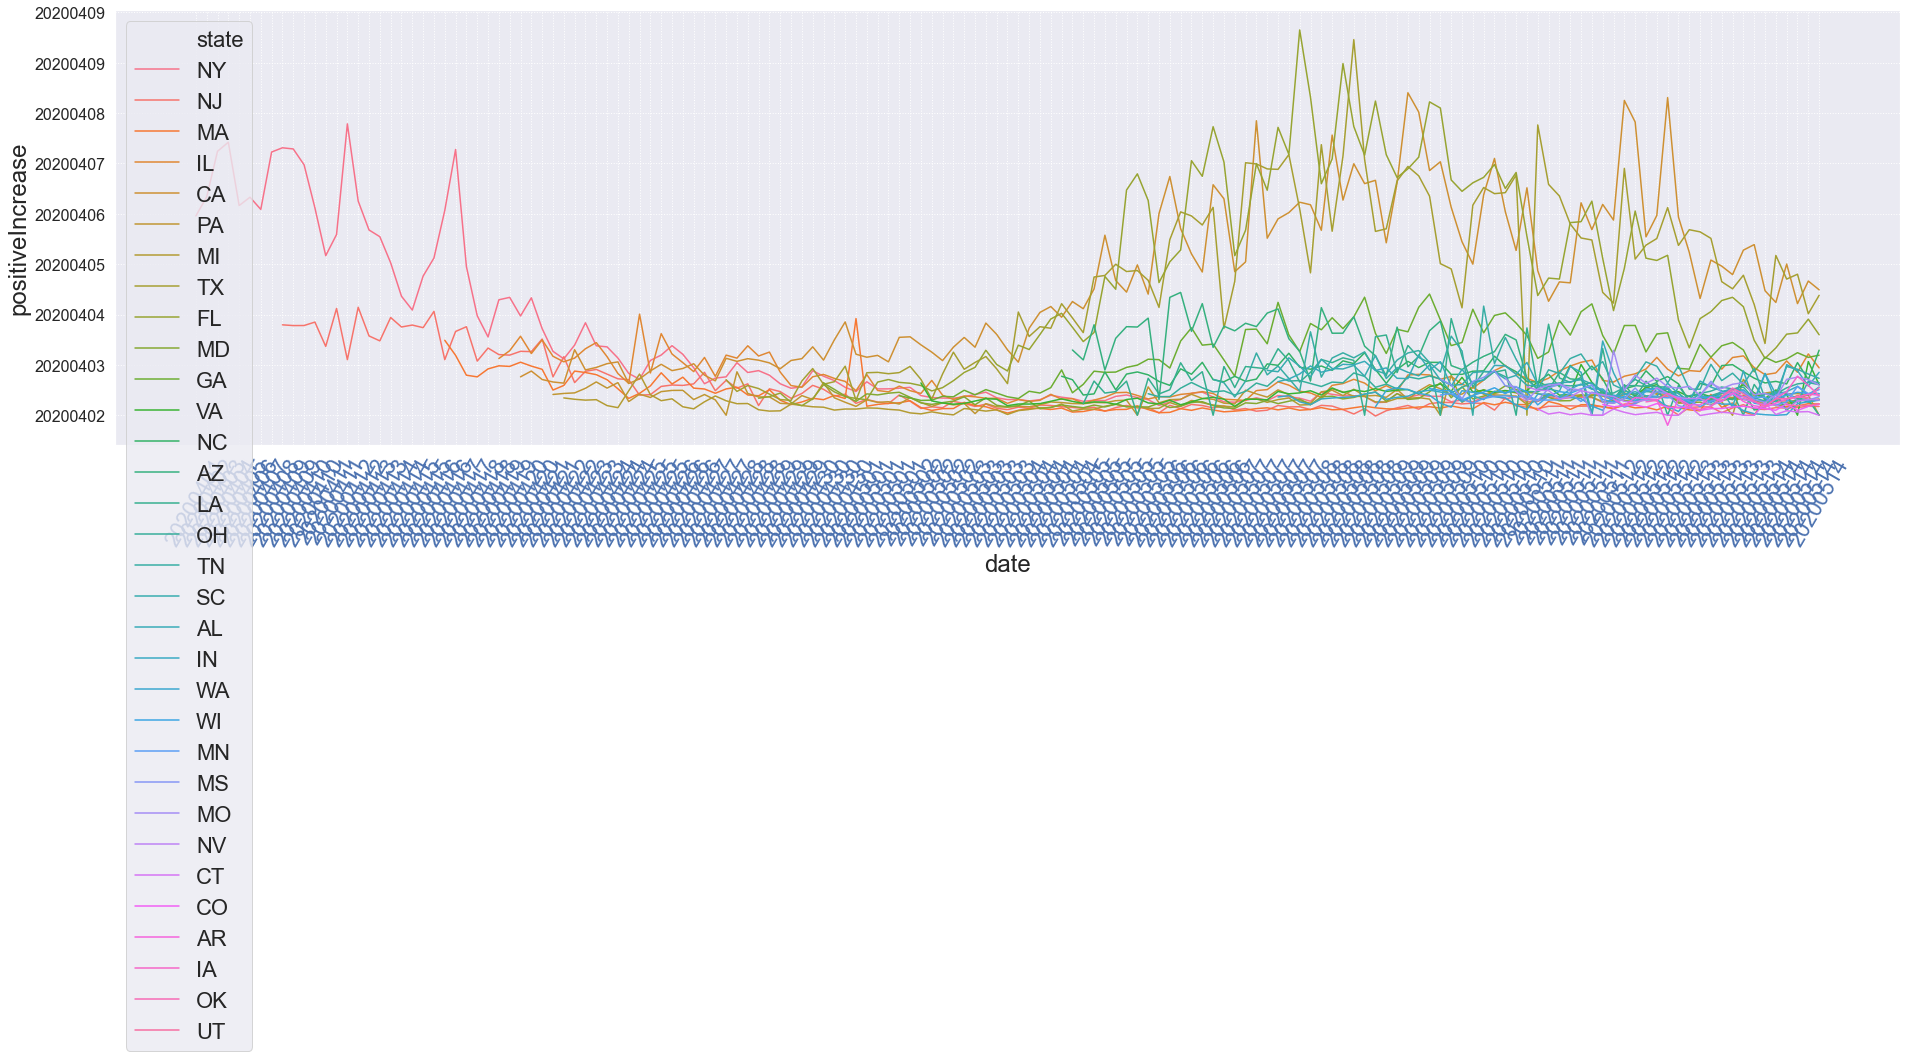

In [20]:
ax = sns.lineplot(x='date', y='positiveIncrease', hue="state", markers=True, data=df5)
ax.tick_params(axis='x', colors='b') # x轴
ax.set_xticklabels(df5['date'], rotation=60)
ax.set_yticklabels(ax.get_xticklabels(),fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)
plt.grid(linestyle=':')
plt.show()